In [1442]:
import sys
sys.setrecursionlimit(5000)

In [1443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [1444]:
data_path = 'C://Users//ARUP SARKAR//Desktop//ML//Linear Reg Practical Imp//smartwatchprice//data//smartwatches.csv'
df = pd.read_csv(data_path,encoding='utf8')
df.drop_duplicates(inplace=True)
# train_df = df.sample(frac=0.8, random_state=42)
# test_df = df.drop(train_df.index)
# train_df = train_df.reset_index(drop=True)
# test_df = test_df.reset_index(drop=True)


In [1445]:
train_df=df.copy()

In [1446]:
df.shape,train_df.shape

((450, 16), (450, 16))

In [1447]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [1448]:
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [1449]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [1450]:
train_df['Display Size'].isna().sum()

30

In [1451]:
train_df['Display Size'].value_counts().count()

40

In [1452]:
train_df.fillna({'Display Size':'0.0 inches'}, inplace=True)

In [1453]:
train_df['Display Size'].isna().sum()

0

In [1454]:
train_df['Display Size']=train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [1455]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [1456]:
train_df.replace({'Display Size':0.0},np.nan,inplace=True)

In [1457]:
train_df['Display Size'].isna().sum()

31

In [1458]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [1459]:
import re

In [1460]:
re.findall(r'\d+','20 - 35 g')

['20', '35']

In [1461]:
cal=sum([int(x) for x in re.findall(r'\d+','20 - 35 g')])/2
train_df.replace({'Weight':'20 - 35 g'},cal,inplace=True)

In [1462]:
cal=sum([int(x) for x in re.findall(r'\d+','35 - 50 g')])/2
train_df.replace({'Weight':'35 - 50 g'},cal,inplace=True)

In [1463]:
cal=sum([int(x) for x in re.findall(r'\d+','50 - 75 g')])/2
train_df.replace({'Weight':'50 - 75 g'},cal,inplace=True)

In [1464]:
train_df.replace({'Weight':'75g +'},float(re.findall(r'\d+','75+')[0],),inplace=True)

In [1465]:
train_df.replace({'Weight':'<= 20 g'},float(re.findall(r'\d+','<= 20 g')[0],),inplace=True)

C:\Users\ARUP SARKAR\AppData\Local\Temp\ipykernel_10340\3997739117.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.replace({'Weight':'<= 20 g'},float(re.findall(r'\d+','<= 20 g')[0],),inplace=True)


In [1466]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [1467]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [1468]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,42.5
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5


In [1469]:
train_df['Discount Price']=(train_df['Original Price']*(-train_df['Discount Percentage']))/100

In [1470]:
train_df.drop(['Discount Percentage'],axis=1,inplace=True)

Numerical Data 

In [1471]:
numerical_col=[feature for feature in train_df.columns if train_df[feature].dtype=='float64']

In [1472]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [1473]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000


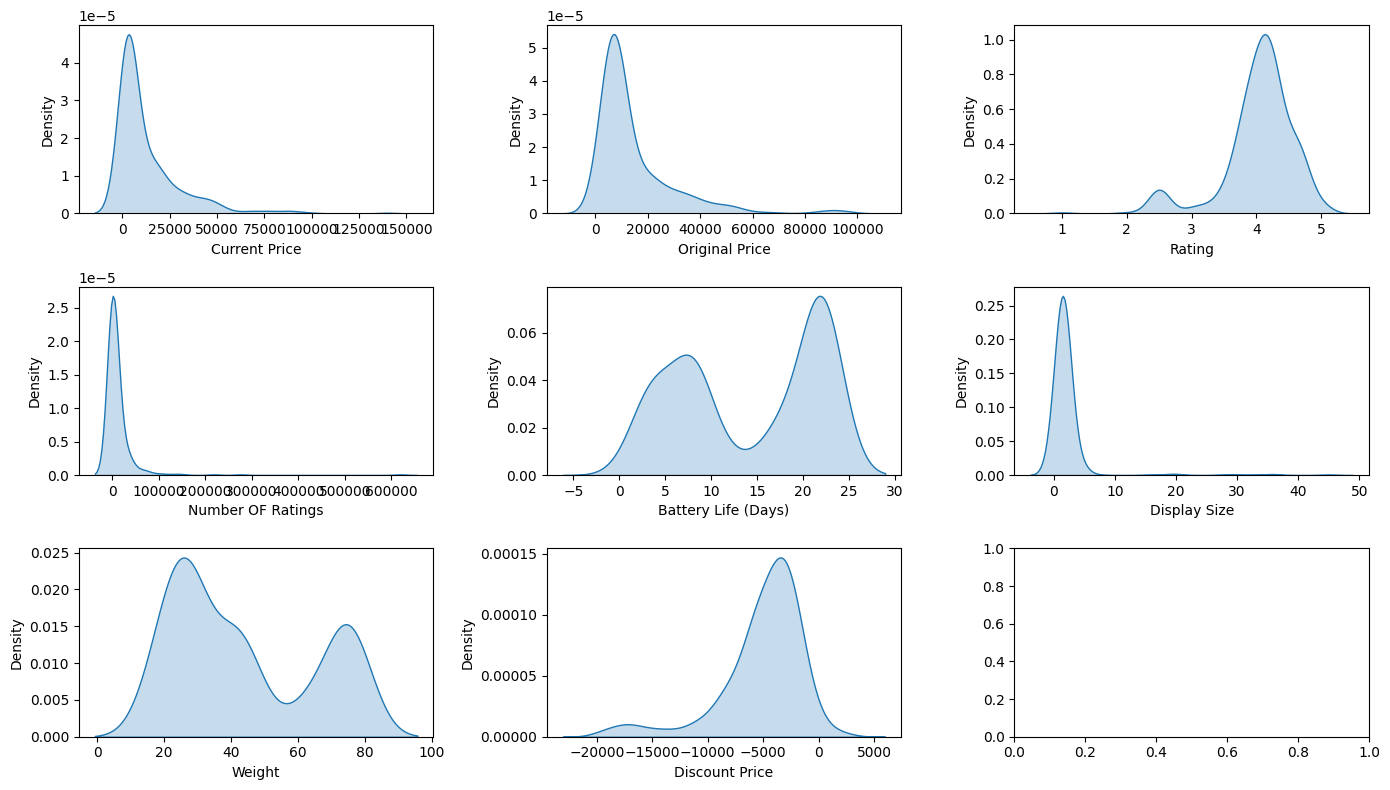

In [1474]:
# Plotting the Density Graph
fig , axes =plt.subplots(nrows=3,ncols=3,figsize=(14,8))

for i, column in enumerate(numerical_col):
    row=i//3
    col=i%3
    ax=axes[row,col]
    sns.kdeplot(data=train_df[column],ax=ax,fill=True)
fig.tight_layout()
plt.show()

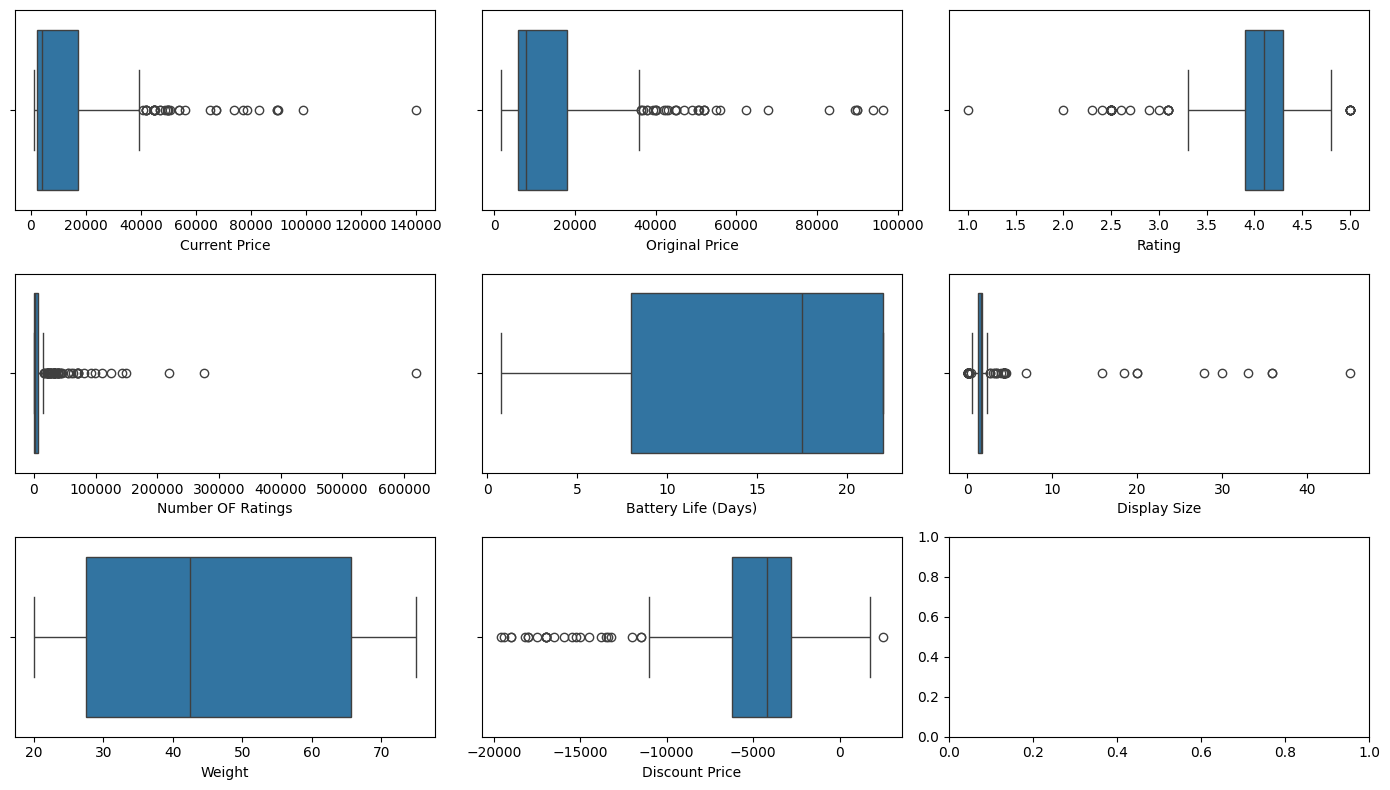

In [1475]:
# Plotting the Density Graph
fig , axes =plt.subplots(nrows=3,ncols=3,figsize=(14,8))

for i, column in enumerate(numerical_col):
    row=i//3
    col=i%3
    ax=axes[row,col]
    sns.boxplot(x=train_df[column],ax=ax)
fig.tight_layout()
plt.show()

In [1476]:
def remove_outliers_IQR(data,col):
    Q1=data[col].quantile(0.25)
    Q2=data[col].quantile(0.75)
    IQR= Q2 - Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q2+1.5*IQR
    return data[(data[col]>lower_bound)&(data[col]<upper_bound)]

In [1477]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [1478]:
train_df.shape

(450, 15)

In [1479]:
import_col=['Current Price','Original Price','Rating','Number OF Ratings','Display Size']

In [1480]:

for col in ['Battery Life (Days)', 'Weight']:
    print(col)
    # First, try to convert to numeric, coercing errors to NaN
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')

Battery Life (Days)
Weight


In [1481]:
for col in import_col:
    train_df=remove_outliers_IQR(train_df,col)


In [1482]:
for col in numerical_col:
    print(col)
    median_value = train_df[col].median()
    train_df.fillna({col:median_value},inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [1483]:
train_df.shape

(181, 15)

In [1484]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [1485]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000
5,1499.0,3999.0,4.0,32704.0,8.0,1.7,42.5,-2500.000000


In [1486]:
from sklearn.preprocessing import MinMaxScaler

In [1487]:
scaler = MinMaxScaler()

In [1488]:
data= scaler.fit_transform(train_df[numerical_col[:-1]])

In [1489]:
data

array([[0.1116311 , 0.56836451, 0.83333333, ..., 0.12941176, 0.61538462,
        0.77272727],
       [0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.02576102, 0.68105326, 0.83333333, ..., 0.12941176, 0.61538462,
        1.        ],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [1490]:
data=pd.DataFrame(data,columns=numerical_col[:-1])

In [1491]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [1492]:
data.shape, train_df.shape

((181, 7), (181, 15))

In [1493]:
data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [1494]:
train_df.drop(numerical_col[:-1],axis=1,inplace=True)

In [1495]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001
2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000
3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000
5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000


In [1496]:
train_df.isna().sum()

Brand              0
Model Name         9
Dial Shape        65
Strap Color       65
Strap Material    26
Touchscreen        6
Bluetooth          0
Discount Price     0
dtype: int64

In [1497]:
train_df.shape,data.shape

((181, 8), (181, 7))

In [1498]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [1499]:
pd.concat([train_df.reset_index(),data],axis=1).shape

(181, 16)

In [1500]:
train_df=pd.concat([train_df.reset_index(),data],axis=1)

In [1501]:
train_df.isna().sum()

index                   0
Brand                   0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Bluetooth               0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [1502]:
train_df.head()

,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [1503]:
train_df[numerical_col]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000
...,...,...,...,...,...,...,...,...
176,0.184621,0.211517,0.500000,0.000569,1.000000,0.615385,0.409091,-2000.000000
177,0.068696,0.136391,0.500000,0.000569,1.000000,0.538462,0.409091,-2700.000000
178,0.029969,0.001164,0.000000,0.000030,1.000000,1.000000,0.409091,-2.000000
179,0.120218,0.305424,0.333333,0.000000,1.000000,0.538462,0.409091,-6000.000000


In [1504]:
train_df.shape

(181, 16)

Categorical Data

In [1505]:
categorical_col=[feature for feature in train_df.columns if train_df[feature].dtype=='object']

In [1506]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [1507]:
train_df[categorical_col].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
1,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
2,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
4,noise,NSW-05,NaN,NaN,Other,Yes,Yes


In [1508]:
train_df['Bluetooth'].value_counts()

Bluetooth
Yes    181
Name: count, dtype: int64

In [1509]:
categorical_col.remove('Bluetooth')

In [1510]:
from scipy.stats import f_oneway

In [1511]:
for col in categorical_col:
    CategoreyGroupLists=train_df.groupby(col)['Discount Price'].apply(list)
    AnnovaResults=f_oneway(*CategoreyGroupLists)
    print(col,': ','P-Value for annova is : ',AnnovaResults[1])

Brand :  P-Value for annova is :  8.421850586222264e-14
Model Name :  P-Value for annova is :  4.2637443020007396e-05
Dial Shape :  P-Value for annova is :  0.00012368727588900151
Strap Color :  P-Value for annova is :  0.06574836943894022
Strap Material :  P-Value for annova is :  0.00039800860157354607
Touchscreen :  P-Value for annova is :  0.9803878528536757


In [1512]:
# The p in annova test must be <0.05(only then considered)

imp_col=['Brand','Model Name','Dial Shape','Strap Color','Strap Material']

In [1513]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material
0,fire-boltt,BSW046,NaN,NaN,Silicon
1,boat,Wave Call,NaN,NaN,Silicon
2,fire-boltt,BSW053,NaN,NaN,Silicon
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other
4,noise,NSW-05,NaN,NaN,Other


In [1514]:
for col in imp_col:
    train_df.fillna({col:'other'},inplace=True)

In [1515]:
train_df[imp_col].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Color       0
Strap Material    0
dtype: int64

In [1516]:
brand=pd.get_dummies(train_df['Brand'],drop_first=True)

In [1517]:
model_name=pd.get_dummies(train_df['Model Name']).drop(['other'],axis=1)
dial_shape=pd.get_dummies(train_df['Dial Shape']).drop(['other'],axis=1)
strap_material=pd.get_dummies(train_df['Strap Material']).drop(['other'],axis=1)

In [1518]:
imp_df=pd.concat([brand,model_name,strap_material,dial_shape],axis=1)

In [1519]:
imp_df.head()

,ambrane,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,hammer,...,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene,Circle,Curved,Rectangle,Square
0,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1520]:
new_df=pd.concat([train_df[numerical_col],imp_df],axis=1)

In [1521]:
new_df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene,Circle,Curved,Rectangle,Square
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,False,True,...,False,False,True,False,False,False,False,False,False,False
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1522]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Thermo Plastic Polyurethene    0
Circle                         0
Curved                         0
Rectangle                      0
Square                         0
Length: 201, dtype: int64

In [1525]:

new_df.to_csv('C:/Users/ARUP SARKAR/Desktop/ML/Linear Reg Practical Imp/smartwatchprice/data/processed_smartwatches.csv', index=False)
